# Project -- AI-powered Acoustic Monitoring and Knowledge Assistants for an Indigenous Community in Peru

## Exploratory Data Analysis 

The project will use audio data collected for different bird for species monitoring. The data are 

Colorful & Spectacular Birds:                         Number of Recordings\
Rupicola peruvianus,  					                            158 \
Andigena hypoglauca,                        					     64	 \
Aulacorhynchus coeruleicinctis,                      			     27	 

Rare & Elusive Birds 
Doliornis sclateri,                  						         11 \
Pipile cumanensis,                  						         49 \
Gallinago jamesoni,                                                  56 \
Tinamus osgoodi,                                                     20 

Fascinating Behavior & Display Birds:     
Pionus tumultuosus,               						             15 \
Hapalopsittaca melanotis,                       			         11 

We will first explore the data and understand the features for model training and prediction:

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import IPython.display as ipd  # To play sound in the notebook

In [3]:
audio1 = "XC178.mp3"   # This is a sample of bird Jameson's Snipe (Common Name), Gallinago jamesoni (Scientific Name)
y, sample_rate = librosa.load(audio1)
ipd.Audio(audio1, rate = sample_rate)

In [4]:
audio2 = "XC333241.mp3" # This is a sample of bird Andean Cock-of-the-rock (Common Name), Rupicola peruvianus (Scientific Name)
y, sample_rate = librosa.load(audio2)
ipd.Audio(audio2, rate = sample_rate)

### Time domain represenation of bird audio signal

In [5]:
def plot_audio_signals_subplots(audio_files, output_file="subplots_plot.png"):
    """Plots multiple audio signals as subplots and saves the result."""
    num_files = len(audio_files)
    plt.figure(figsize=(10, 4 * num_files))  # Adjust size to fit all subplots
    
    for idx, audio_file in enumerate(audio_files):
        try:
            # Load audio signal
            y, sample_rate = librosa.load(audio_file)
            
            # Create a subplot for each signal
            plt.subplot(num_files, 1, idx + 1)
            
            # Plot waveform
            librosa.display.waveshow(y, sr=sample_rate)
            plt.title(f"Audio Signal {idx + 1}: {audio_file}")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            #plt.legend(loc="upper right")
            plt.grid()
        except Exception as e:
            print(f"Error processing file {audio_file}: {e}")
    
    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()
    print(f"Plot saved to {output_file}")

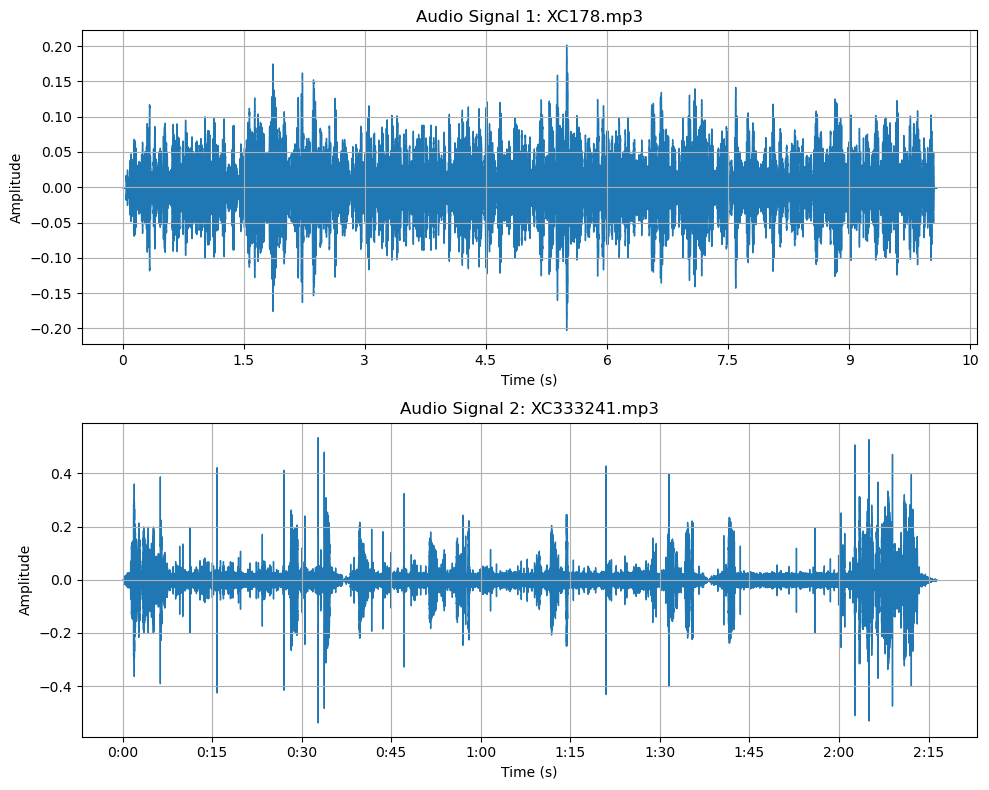

Plot saved to subplots_plot.png


In [6]:
# plot audio signals of bird - xxx and xxx
audio_files = ["XC178.mp3", "XC333241.mp3"]  # Replace with your audio file paths
plot_audio_signals_subplots(audio_files)

Time Domain plot of audio signal present the acoustic energy magnitude along the time. The features from time domain such as magnitude, variance are not representative to be applied for bird classification.

Features from Frequency domain are expected to give more characteristics of bird sound signature, 

### Time-Frequency domain respresentaton of bird audio signal

In [7]:
def plot_audio_spectrogram_subplots(audio_files, output_file="subplots_plot.png"):
    """Plots multiple audio signals as subplots and saves the result."""
    num_files = len(audio_files)
    plt.figure(figsize=(10, 6* num_files))  # Adjust size to fit all subplots
    
    for idx, audio_file in enumerate(audio_files):
        try:
            # Load audio signal
            y, sample_rate = librosa.load(audio_file)
            
            # Create a subplot for spectrogram of each audio signal
            plt.subplot(num_files, 1, idx + 1)
            
            # Plot spectrogram
            spectrogram = np.abs(librosa.stft(y, n_fft=2048,  hop_length=512))
            spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))
            librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='log')
            
            plt.title(f"Spectrogram of Audio Signal {idx + 1}: {audio_file}")
            plt.xlabel("Time (s)")
            plt.ylabel("Frequency (Hz)")
            #plt.legend(loc="upper right")
            plt.grid()
        except Exception as e:
            print(f"Error processing file {audio_file}: {e}")
    
    # Adjust layout and save the plot
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()
    print(f"Plot saved to {output_file}")

In [8]:
def plot_shared_color_spectrograms(audio_files, output_file="shared_color_spectrograms.png"):
    """Plots spectrograms of multiple audio files with a shared color scale."""
    spectrograms_db = []  # To store spectrogram data for all files

    # Step 1: Compute the spectrograms and their global dB range
    for audio_file in audio_files:
        y, sample_rate = librosa.load(audio_file)  # Load audio
        spectrogram = np.abs(librosa.stft(y, n_fft=2048,  hop_length=512))  # Compute STFT
        spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)  # Convert to dB
        spectrograms_db.append(spectrogram_db)

    # Find global min and max values across all spectrograms for a shared color scale
    global_min = min(s.min() for s in spectrograms_db)
    global_max = max(s.max() for s in spectrograms_db)

    # Step 2: Plot the spectrograms with a shared color scale
    plt.figure(figsize=(12, 6 * len(audio_files)))  # Adjust figure size to fit all subplots
    for idx, (spectrogram_db, audio_file) in enumerate(zip(spectrograms_db, audio_files)):
        plt.subplot(len(audio_files), 1, idx + 1)
        librosa.display.specshow(
            spectrogram_db,
            sr=sample_rate,
            x_axis="time",
            y_axis="log",
            cmap="magma",
            vmin=global_min,  # Set shared minimum value
            vmax=global_max,  # Set shared maximum value
        )
        plt.title(f"Spectrogram {idx + 1}: {audio_file}")
        plt.colorbar(format="%+2.0f dB")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")

    # Step 3: Save and display the plot
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()
    print(f"Plot saved to {output_file}")

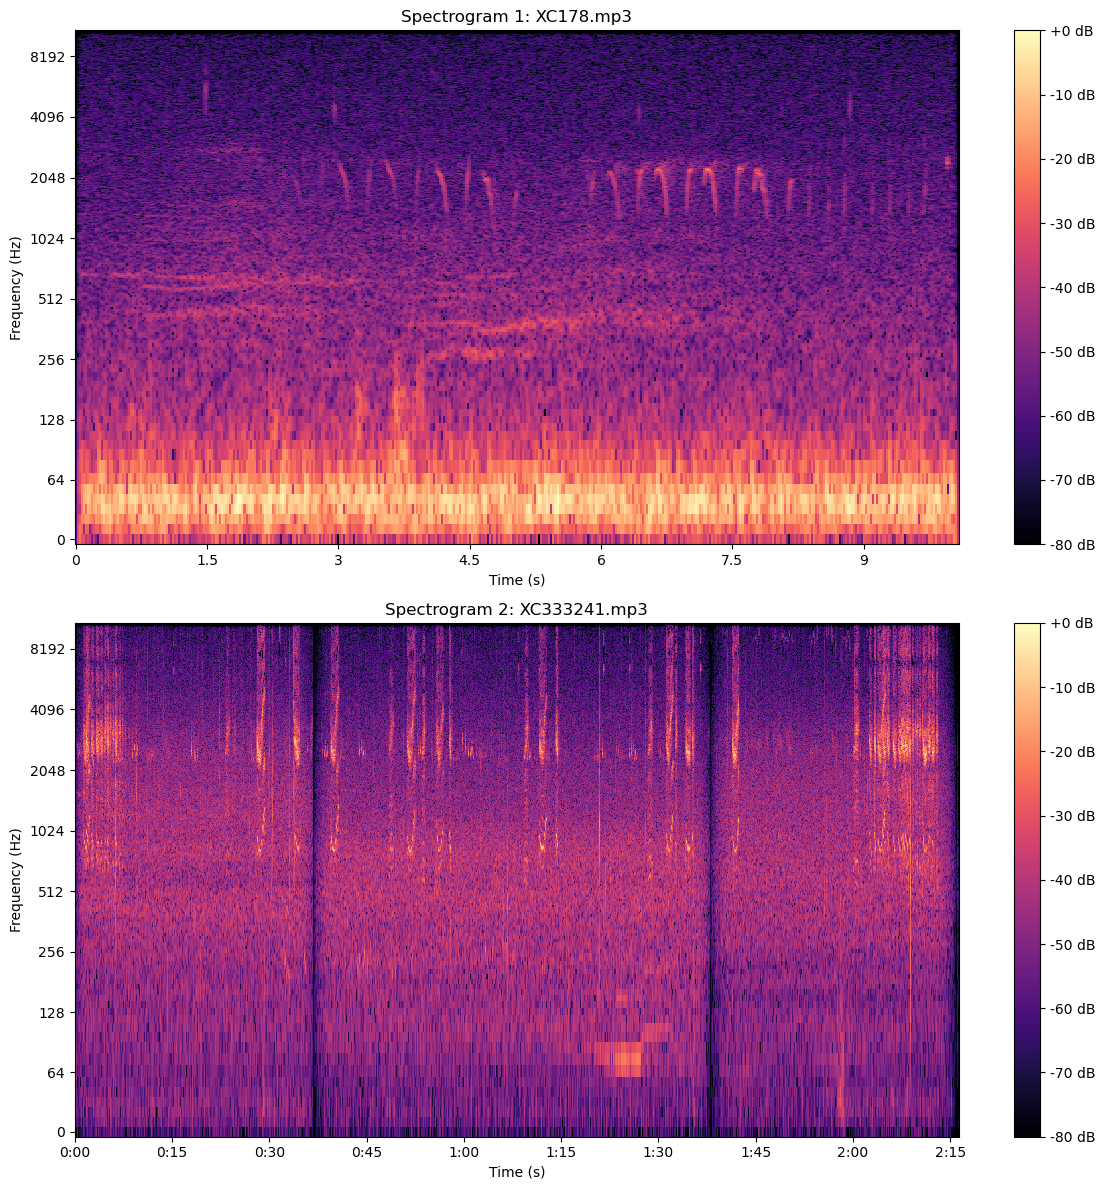

Plot saved to shared_color_spectrograms.png


In [9]:
# Plot the spectrograms for bird xxx and xxx
plot_shared_color_spectrograms(audio_files)

## Model Prediction using BirdNet 

In [10]:
from birdnetlib import Recording
from birdnetlib.analyzer import Analyzer
from datetime import datetime

In [11]:
# Load and initialize the BirdNET-Analyzer models.
analyzer = Analyzer()

Labels loaded.
load model True
Model loaded.
Labels loaded.
load_species_list_model
Meta model loaded.


In [12]:
recording = Recording(
    analyzer,
    audio1,
)

In [13]:
recording.analyze()
print(recording.detections)

read_audio_data
read_audio_data: complete, read  3 chunks.
analyze_recording XC178.mp3
[{'common_name': "Jameson's Snipe", 'scientific_name': 'Gallinago jamesoni', 'start_time': 3.0, 'end_time': 6.0, 'confidence': 0.891212522983551, 'label': "Gallinago jamesoni_Jameson's Snipe"}, {'common_name': "Jameson's Snipe", 'scientific_name': 'Gallinago jamesoni', 'start_time': 6.0, 'end_time': 9.0, 'confidence': 0.9884987473487854, 'label': "Gallinago jamesoni_Jameson's Snipe"}]


In [14]:
from collections import defaultdict

def calculate_average_confidence(bird_data):
    # Step 1: Group confidence values by bird species
    species_confidences = defaultdict(list)
    for entry in bird_data:
        species = entry['scientific_name']
        confidence = entry['confidence']
        species_confidences[species].append(confidence)
    
    # Step 2: Calculate the average confidence for each species
    average_confidences = []
    for species, confidences in species_confidences.items():
        avg_confidence = sum(confidences) / len(confidences)
        average_confidences.append({
            'scientific_name': species,
            'average_confidence': avg_confidence
        })
        
    # Step 3: Sort by average confidence (descending order)
    average_confidences.sort(key=lambda x: x['average_confidence'], reverse=True)
    
    return average_confidences

In [15]:
results1 = calculate_average_confidence(recording.detections)

In [16]:
confidence_threshold = 0.3
species_in_audio = [d for d in results1 if d['average_confidence'] > confidence_threshold]

In [17]:
species_in_audio

[{'scientific_name': 'Gallinago jamesoni',
  'average_confidence': 0.9398556351661682}]

In [18]:
# Rare species may be detected when the maximum confidence is lower than a threshold
if len(species_in_audio) == 0:
    print('The species predicted with lower confidence, this bird may be an rare species not in the traning list')
    print('please try a transfer learning model')

In [19]:
# Try another bird song
recording = Recording(
    analyzer,
    audio2,
)
recording.analyze()

read_audio_data
read_audio_data: complete, read  45 chunks.
analyze_recording XC333241.mp3


In [20]:
results2 = calculate_average_confidence(recording.detections)

In [21]:
confidence_threshold = 0.3
species_in_audio = [d for d in results2 if d['average_confidence'] > confidence_threshold]

In [22]:
species_in_audio

[{'scientific_name': 'Rupicola peruvianus',
  'average_confidence': 0.8788620421180019},
 {'scientific_name': 'Pachyramphus polychopterus',
  'average_confidence': 0.5317267179489136},
 {'scientific_name': 'Baeolophus atricristatus',
  'average_confidence': 0.3165684938430786},
 {'scientific_name': 'Pachyramphus albogriseus',
  'average_confidence': 0.315415620803833}]

In [23]:
# Rare species may be detected when the maximum confidence is lower than a threshold
if len(species_in_audio) == 0:
    print('The species predicted with lower confidence, this bird may be an rare species not in the traning list')
    print('please try a transfer learning model')

## Apply Transfer Learning with New Species

#### Obtain BirdNet model:
Access the BirdNet model either through the BirdNet app, the online platform, or by downloading the BirdNet Analyzer (available on GitHub). 
Prepare your data:

#### Record audio: Collect audio recordings of your target bird species. 
Segment and label: Split your audio recordings into relevant segments and assign accurate labels for each sound category. 

#### Extract BirdNet embeddings:
Run audio through BirdNet: Use the BirdNet model to process your audio data, generating embedding vectors for each audio segment. 
Feature extraction: These embeddings capture the essential characteristics of the bird sounds, which can be used for further classification. 

#### Train a new classifier:
Choose a classifier: Select a machine learning model (like a Support Vector Machine, Random Forest, or a neural network) to train on the extracted BirdNet embeddings. 

Train with your data: Feed the BirdNet embeddings and corresponding labels from your dataset into the chosen classifier to train it specifically for your target species. 

In [24]:
recording.extract_embeddings()
print(recording.embeddings)

read_audio_data
read_audio_data: complete, read  45 chunks.
extract_embeddings_for_recording XC333241.mp3
[{'start_time': 0, 'end_time': 3.0, 'embeddings': [0.10378342121839523, 0.8277633786201477, 0.8890960812568665, 0.0, 0.6721237301826477, 0.2353302389383316, 1.0930461883544922, 0.7529089450836182, 0.0436517596244812, 0.09717464447021484, 0.015252262353897095, 0.893025815486908, 0.21487565338611603, 0.17551779747009277, 0.28034377098083496, 0.0, 0.05623069405555725, 1.9104951620101929, 0.032886069267988205, 0.27346354722976685, 0.1957639455795288, 0.020914724096655846, 1.1154485940933228, 0.0, 1.6255956888198853, 0.3755742013454437, 0.03447222709655762, 0.0, 0.13032853603363037, 0.11086937040090561, 0.0, 1.4061142206192017, 1.117451786994934, 0.04381275177001953, 0.0, 0.0, 0.5604998469352722, 0.983112096786499, 0.10400289297103882, 0.008395354263484478, 0.8256708979606628, 0.9172161221504211, 0.17869813740253448, 0.0, 0.15425284206867218, 0.4076126515865326, 1.0400476455688477, 0.12

In [25]:
embeddings=recording.embeddings

In [26]:
len(embeddings[0]['embeddings'])

1024